In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

from pathlib import Path

%matplotlib inline  

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data_path = Path("/Users/jessicabartley/Documents/JessicaBartley/Documents/FIU/Research/ABCD-Repronim/2020/surveyResults")
files = sorted(data_path.glob("*.csv"))

pre_df = pd.read_csv(files[1], sep=',', encoding='latin-1')
pre_df['Full Name'] = pre_df['First Name'] + pre_df['Last Name']

post_df = pd.read_csv(files[0], sep=',', encoding='latin-1')
post_df = post_df.rename(columns={"First name": "First Name", "Last name": "Last Name"})
post_df['Full Name'] = post_df['First Name'] + post_df['Last Name']
projwk_df = post_df[post_df['Did you participate in the ABCD-ReproNim Project Week?'] == 'Yes']


In [6]:
#check for duplicate entries
def checkdups(dfs):
    for df in dfs:
        reduced_df = df.filter(['First Name', 'Last Name'])
        duplicateRowsDF = df[df.duplicated()]
        isempty = duplicateRowsDF.empty
        if isempty == False:
            print("Duplicate Rows except first occurrence based on all columns are :")
            print(duplicateRowsDF)
        elif isempty == True:
            print("No Duplicate Entries")
        else:
            print("An error occured when checking for duplicaets")

In [7]:
matched_cols = {'Familarity with ABCD experimental design': 'How familiar are you now with ABCD Study experimental design, including participant sampling, recruitment, enrollment, and retention?', 
                'Familarity with ABCD assessments': 'How familiar are you now with ABCD Study assessments (e.g., demographics, physical health, mental health, neurocognition, substance use, culture, and environment)?', 
                'Familarity with ABCD neuroimaging acquisition and analytics': 'How familiar are you now with the ABCD Study neuroimaging acquisition and analytics?', 
                'Familarity with ABCD biospecimens and novel tech': 'How familiar are you now with the ABCD Study biospecimens and novel technologies (e.g., mobile, wearable, and social media) content described above?', 
                'Have you analyzed ABCD data?': 'Have you analyzed any data from the ABCD Study data?', 
                'Familarity with the drive for reproducible neuroimaging research': 'How familiar are you with the drive for reproducible neuroimaging research? (e.g., examples of how the lack of reproducibility is "costing" the neuroimaging research enterprise, "re-executable" publications for enhancing reproducibility in the field overall, etc.)', 
                'Familarity with FAIR data principles and achieving them': 'How familiar are you with FAIR Data Principles and strategies for making research outputs follow these principles? (e.g., that data are Findable, Accessible, Interoperable and Re-Usable, how to make data FAIR via BIDS (Brain Imaging Data Structure) and NIDM (Neuroimaging Data Model) data structures, metadata, common data elements, terminologies/ontologies, and semantic annotation of data, pyNIDM - a Python library to manipulate the Neuroimaging Data Model.)', 
                'Familarity with computational basics': 'How familiar are you with the computational basics? (e.g., shell, distributions, version control systems relevant to make your research more reproducible, container technologies and their benefits, how to use Git/git-annex/DataLad for version control of code, data, Neurodocker for creating computational environments, etc.)', 
                'Familarity with neuroimaging workflows': 'How familiar are you with the neuroimaging workflows? (e.g., using reusable analysis tools to track provenance, container technologies, sources of variability that affect scientific results, using HeuDiConv/ReproIn for automated conversion into BIDS, DataLad for version control and data and container logistics, setting up re-executable analyses and establishing testing practices, etc.)', 
                'Familarity with statistics': 'How familiar are you with statistics? (e.g., how to address the statistical aspects of reproducibility, the p-value and its limited ability to represent evidence in results, practical notions of power and associated tools, etc.")', 
                'Comfortability in performing reproducible analyses with ABCD data': 'How comfortable are you with performing reproducible analyses of ABCD Study data? '
               }
post_only_cols_likert = {'Satisfaction with amount learned': 'Thinking of your experiences over Project Week, how satisfied were you with.... [how much you learned]', 
                  'Satisfaction with team progress': 'Thinking of your experiences over Project Week, how satisfied were you with.... [the amount of progress your team made]', 
                  'Satisfaction with the reproducibility of your work': 'Thinking of your experiences over Project Week, how satisfied were you with.... [the reproducibility of your work (e.g., code versioning, workflow management, holding up FAIR principles)]', 
                  'Satisfaction with support from the ABCD-ReproNim team': 'Thinking of your experiences over Project Week, how satisfied were you with.... [the support you received from the ABCD-ReproNim team]', 
                  'Satisfaction with available computational resources': 'Thinking of your experiences over Project Week, how satisfied were you with.... [the JupyterHub and available computational resources]', 
                  'Satisfaction with the professional connections/friendships made': 'Thinking of your experiences over Project Week, how satisfied were you with.... [the professional connections and/or friendships you made]', 
                  'Did your team create a Project Week GitHub Repo': 'Was your team able to create a GitHub repository for the code you developed over the course of Project Week?', 
                  'Plans to keep working on project?': 'Do you plan to keep working on your project past Project Week?', 
                  'Recommend the ABCD-ReproNim Project Week?': 'Would you recommend the ABCD-ReproNim Project Week event to your friends/peers?', 
                        }

post_only_cols_longform = {'What was your favorite thing about Project Week?': 'What was your favorite thing about Project Week?', 
                           'What is one thing you would improve about Project Week?': 'What is one thing you would improve about Project Week?', 
                           'Project Week Reflection': 'Please reflect on your experience at the ABCD-ReproNim Project Week: what did you find useful? How did this event affect you? What would you have done differently? Did you make interesting new connections? Or learn new skills? '
                          }


In [8]:
dfs = [pre_df, post_df]
checkdups(dfs)

No Duplicate Entries
No Duplicate Entries


In [9]:
pre_df['pre/post'] = 'pre'
post_df['pre/post'] = 'post'

In [57]:
def plotunmatched(col_to_plot, title):
    # get counts
    pre_counts = pre_df[col_to_plot].value_counts()
    pre_counts = 100 * pre_counts / pre_counts.sum()
    post_counts = post_df[col_to_plot].value_counts()
    post_counts = 100 * post_counts / post_counts.sum()
    
    # plot
    outdf = pd.concat([pre_counts, post_counts], axis=1)
    outdf.columns = ['pre', 'post']

    # reformat x tic labels if they are too long
    as_list = outdf.index.tolist()
    for i, index in enumerate(outdf.index):
        if type(index) == int:
            pass
        else:
            if len(index)>5:
                idx = as_list.index(index)
                as_list[idx] = textwrap.fill(index, width=15)
                outdf.index = as_list
            else:
                pass

    outdf = outdf.fillna(0)
    ax = outdf.plot.bar(color=[(0.0, 0.4, 0.3, 0.4), (0.3, 0.5, 0.7, 0.9)])
    textstr = "Unmatched Data \nPre = {0} \nPost = {1}".format(len(pre_df), len(post_df))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.15, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    plt.title(title)
    plt.xticks(rotation=0)
    plt.ylabel('percent')
    plt.xlabel('Likert response')
    ax.set_title(title)

In [58]:
def plotmatched(col_to_plot, title):
    # get matched IDs
    merged_df = pre_df.merge(post_df, how='inner', on='Full Name', suffixes=('_pre', '_post'))
    matched_names = merged_df['Full Name'].tolist()

    # create matched df
    matched_df = pd.concat([pre_df, post_df], join='inner', axis=0)
    matched_df = matched_df[matched_df['Full Name'].isin(matched_names)]
    matched_df

    # get counts
    matched_pre = matched_df.loc[matched_df['pre/post'] == 'pre']
    matched_post = matched_df.loc[matched_df['pre/post'] == 'post']
    pre_counts = matched_pre[col_to_plot].value_counts()
    pre_counts = 100 * pre_counts / pre_counts.sum()
    post_counts = matched_post[col_to_plot].value_counts()
    post_counts = 100 * post_counts / post_counts.sum()

    # plot
    outdf = pd.concat([pre_counts, post_counts], axis=1)
    outdf.columns = ['pre', 'post']

    # reformat x tic labels if they are too long
    as_list = outdf.index.tolist()
    for i, index in enumerate(outdf.index):
        if type(index) == int:
            pass
        else:
            if len(index)>5:
                idx = as_list.index(index)
                as_list[idx] = textwrap.fill(index, width=15)
                outdf.index = as_list
            else:
                pass

    outdf = outdf.fillna(0)
    ax = outdf.plot.bar(color=[(0.0, 0.4, 0.3, 0.4), (0.3, 0.5, 0.7, 0.9)])
    textstr = "Matched Data \nPre = Post = {0}".format(len(matched_pre))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    plt.title(title)
    plt.xticks(rotation=0)
    plt.ylabel('percent')
    plt.xlabel('Likert response')
    ax.set_title(title)

In [59]:
def plotprojectweek(col_to_plot, title):
    counts = projwk_df[col_to_plot].value_counts()
    counts = 100 * counts / counts.sum()

    # reformat x tic labels if they are too long
    as_list = counts.index.tolist()
    for i, index in enumerate(counts.index):
        if type(index) == int:
            pass
        else:
            if len(index)>5:
                idx = as_list.index(index)
                as_list[idx] = textwrap.fill(index, width=15)
                counts.index = as_list
            else:
                pass


    ax = counts.plot.bar(color=(0.3, 0.5, 0.1, 0.9))
    textstr = "N = {0}".format(len(projwk_df))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.85, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    plt.title(title)
    plt.xticks(rotation=0)
    ax.set_title(title)
    plt.ylabel('percent respondands')
    plt.show()

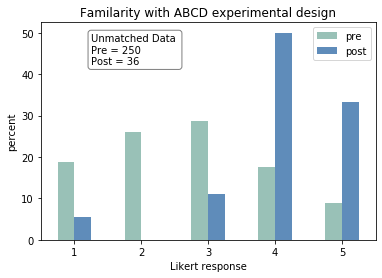

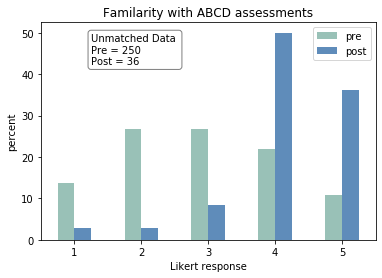

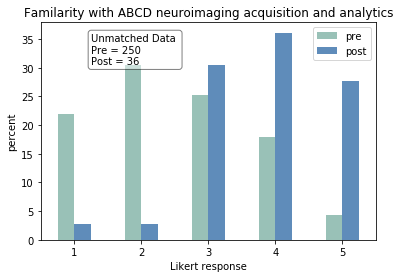

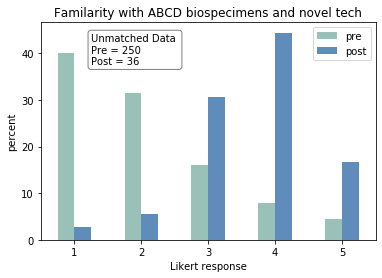

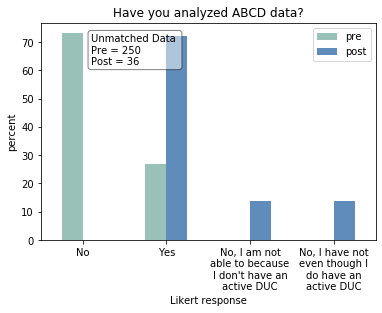

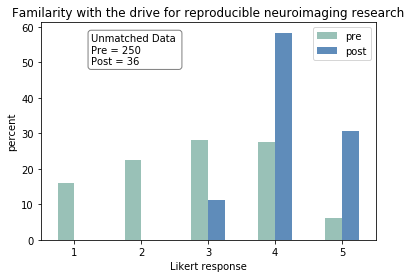

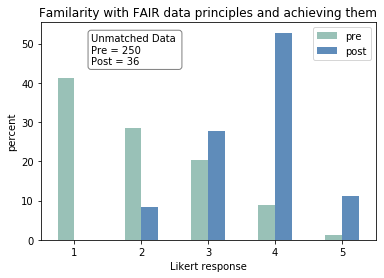

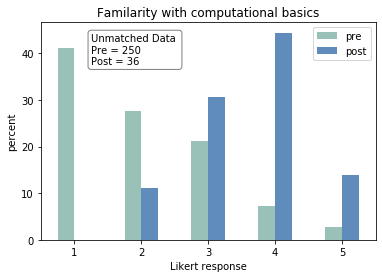

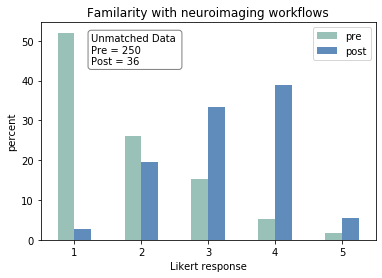

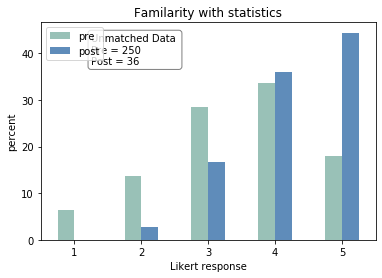

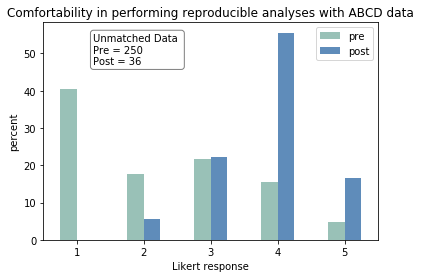

In [60]:
# unmatched plots
for key in matched_cols:
    plotunmatched(matched_cols[key], key)

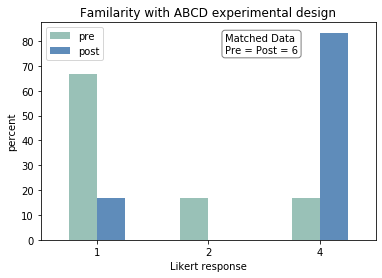

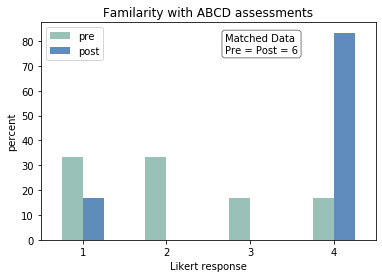

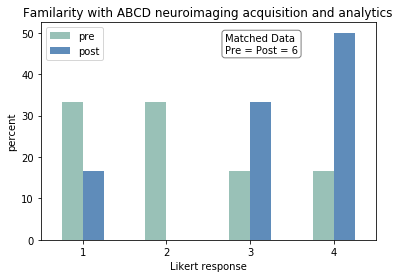

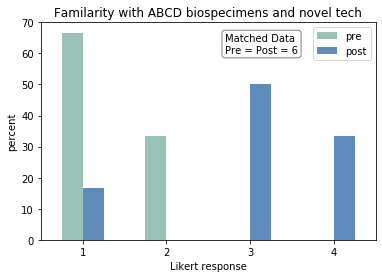

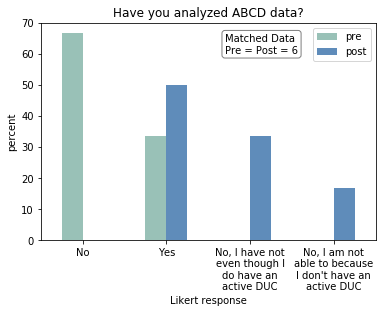

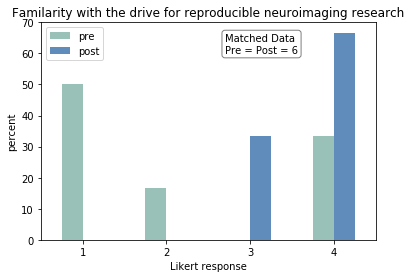

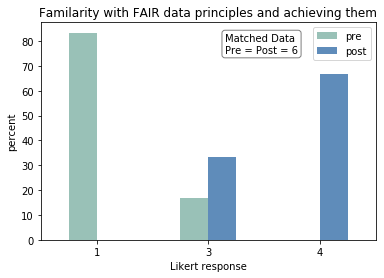

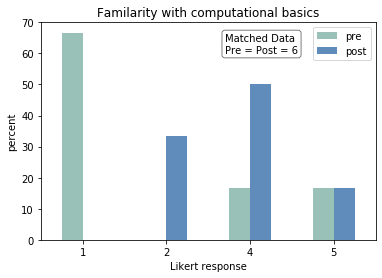

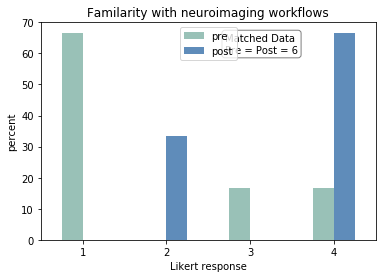

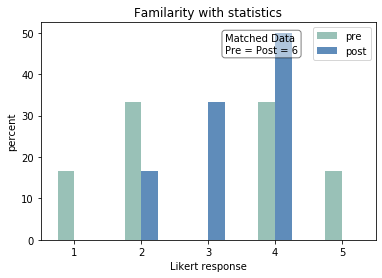

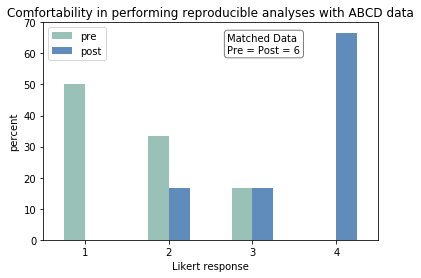

In [61]:
# matched plots
for key in matched_cols:
    plotmatched(matched_cols[key], key)

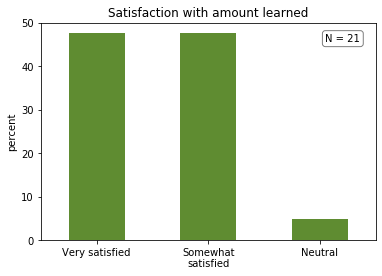

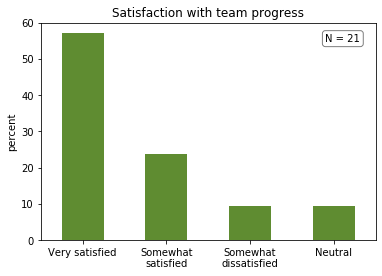

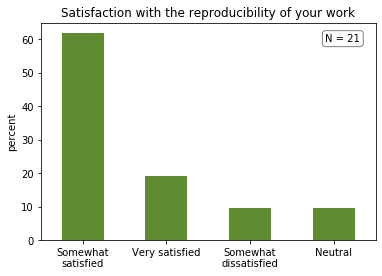

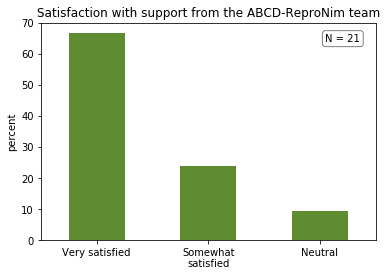

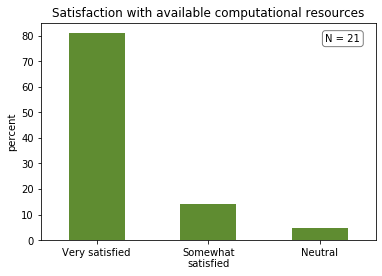

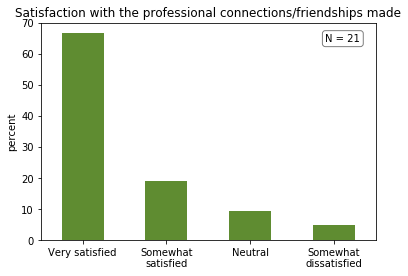

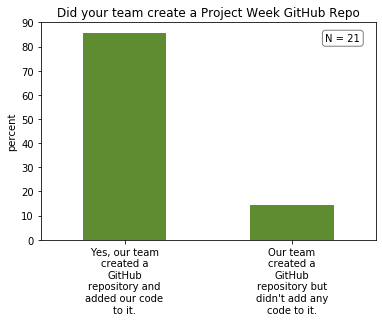

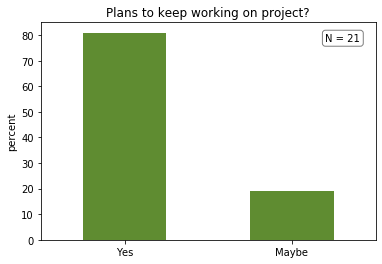

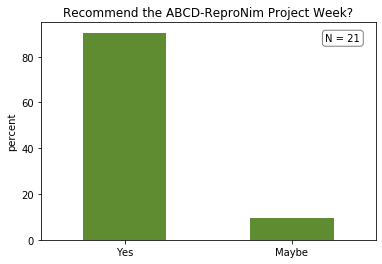

In [62]:
# Project Week plots
for key in post_only_cols_likert:
    plotprojectweek(post_only_cols_likert[key], key)